# Import the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#  import dataset
data_dbd = pd.read_excel('Data DBD Jawa Tengah.xlsx')

# filtering the dataset that we needed, ignore the unnecessarry column
data_dbd_filter=data_dbd.iloc[6:41,[2,3,5,7,9,11,13,15,17,19,21,23,25]]

# rename the column	#E9967A
final_data_dbd=data_dbd_filter.rename(columns={'Unnamed: 2':'Kabupaten/Kodya',
                                              'Unnamed: 3':'Jan',
                                              'Unnamed: 5':'Feb',
                                              'Unnamed: 7':'Mar',
                                              'Unnamed: 9':'Apr',
                                              'Unnamed: 11':'May',
                                              'Unnamed: 13':'Jun',
                                              'Unnamed: 15':'Jul',
                                              'Unnamed: 17':'Aug',
                                              'Unnamed: 19':'Sep',
                                              'Unnamed: 21':'Okt',
                                              'Unnamed: 23':'Nov',
                                              'Unnamed: 25':'Des'})

# reset the index
final_data_dbd.reset_index(drop=True, inplace=True)

# show our boauty dataset
final_data_dbd

,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13
5,PURWOREJO,47,29,32,29,28,22,12,0,3,3,0,12
6,WONOSOBO,7,5,10,9,12,12,2,4,3,0,0,0
7,MAGELANG,40,55,51,52,15,4,13,2,1,16,13,7
8,BOYOLALI,95,121,28,74,34,11,26,7,7,14,15,4
9,KLATEN,40,65,107,126,66,26,51,28,2,16,15,10


# Process the dataset

In [7]:
final_data_dbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kabupaten/Kodya  35 non-null     object
 1   Jan              35 non-null     object
 2   Feb              35 non-null     object
 3   Mar              35 non-null     object
 4   Apr              35 non-null     object
 5   May              35 non-null     object
 6   Jun              35 non-null     object
 7   Jul              35 non-null     object
 8   Aug              35 non-null     object
 9   Sep              35 non-null     object
 10  Okt              35 non-null     object
 11  Nov              35 non-null     object
 12  Des              35 non-null     object
dtypes: object(13)
memory usage: 3.7+ KB


In [8]:
# declareate x as the value of our dataset

X = final_data_dbd.loc[:,['Jan','Feb','Mar',
                    'Apr','May','Jun',
                    'Jul','Aug','Sep',
                    'Okt','Nov','Des']].values

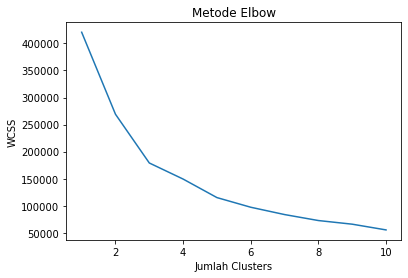

In [9]:
# Use elbow method to detemine the number of cluster

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

Berdasarkan metode elbow, jumlah cluster yang terbaik yaitu 2,3,atau 5. Berdasarkan permintaan Bu Dewi diminta membuat 5 cluster. Maka Akan dibentuk cluster daerah penderita dbd sangat tinggi, cukup tinggi, sedang, cukup rendah, rendah


In [6]:
# just incase if you want to save the image

plt.savefig('Metode Elbow.png')

<Figure size 432x288 with 0 Axes>

In [11]:
# find the centroid for each month and each cluster
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

# show the centroid
print(kmeans.cluster_centers_)

[[ 53.         103.77777778  73.         115.77777778  83.66666667
   53.44444444  36.          23.77777778   8.66666667  19.55555556
   17.88888889  15.88888889]
 [110.75       125.5        102.75        56.5         41.5
   22.75        38.25        21.75        19.5         34.75
   23.5         25.25      ]
 [  7.16666667   8.66666667   7.16666667   7.33333333   8.33333333
    5.           4.33333333   2.5          2.83333333   2.16666667
    1.16666667   0.5       ]
 [ 41.07142857  48.21428571  53.07142857  46.85714286  41.71428571
   30.          24.78571429  17.14285714  10.          14.71428571
   11.28571429  10.64285714]
 [252.         177.          21.5         14.          17.
   11.          25.5         18.5         17.5         16.5
   19.          15.        ]]


## Clustering the dataset

In [13]:
# show the cluster
print(kmeans.labels_)

# Add column "Claster" into dataset
final_data_dbd['Cluster']=kmeans.labels_
final_data_dbd

[0 0 3 3 3 3 2 3 1 0 3 2 3 0 1 4 4 1 0 1 0 0 3 3 0 3 3 3 0 2 3 2 3 2 2]


,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Cluster
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16,0
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15,0
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13,3
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13,3
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13,3
5,PURWOREJO,47,29,32,29,28,22,12,0,3,3,0,12,3
6,WONOSOBO,7,5,10,9,12,12,2,4,3,0,0,0,2
7,MAGELANG,40,55,51,52,15,4,13,2,1,16,13,7,3
8,BOYOLALI,95,121,28,74,34,11,26,7,7,14,15,4,1
9,KLATEN,40,65,107,126,66,26,51,28,2,16,15,10,0


In [14]:
# rename the clustername
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(0,'first cluster')
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(1,'second cluster')
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(2,'third cluster')
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(3,'fourth cluster')
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(4,'fiveth cluster')

# show the dataframe
final_data_dbd

,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Cluster
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16,first cluster
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15,first cluster
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13,fourth cluster
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13,fourth cluster
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13,fourth cluster
5,PURWOREJO,47,29,32,29,28,22,12,0,3,3,0,12,fourth cluster
6,WONOSOBO,7,5,10,9,12,12,2,4,3,0,0,0,third cluster
7,MAGELANG,40,55,51,52,15,4,13,2,1,16,13,7,fourth cluster
8,BOYOLALI,95,121,28,74,34,11,26,7,7,14,15,4,second cluster
9,KLATEN,40,65,107,126,66,26,51,28,2,16,15,10,first cluster


### Cluster 1

In [15]:
first_cluster=final_data_dbd[(final_data_dbd['Cluster']=='first cluster')]
first_cluster

,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Cluster
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16,first cluster
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15,first cluster
9,KLATEN,40,65,107,126,66,26,51,28,2,16,15,10,first cluster
13,SRAGEN,56,100,110,110,71,46,20,16,9,20,19,16,first cluster
18,KUDUS,55,157,108,116,96,49,18,16,8,29,8,10,first cluster
20,DEMAK,76,56,20,118,73,43,73,44,25,38,39,35,first cluster
21,SEMARANG,34,152,52,82,86,84,19,12,0,12,17,11,first cluster
24,BATANG,65,105,53,104,101,47,14,10,6,9,19,14,first cluster
28,BREBES,57,66,108,151,125,73,42,32,12,20,17,16,first cluster


### Cluster 2

In [16]:
second_cluster=final_data_dbd[(final_data_dbd['Cluster']=='second cluster')]
second_cluster

,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Cluster
8,BOYOLALI,95,121,28,74,34,11,26,7,7,14,15,4,second cluster
14,GROBOGAN,120,132,152,10,42,31,47,41,44,49,46,38,second cluster
17,PATI,89,116,121,43,25,16,41,23,11,59,19,31,second cluster
19,JEPARA,139,133,110,99,65,33,39,16,16,17,14,28,second cluster


### Cluster 3

In [17]:
third_cluster=final_data_dbd[(final_data_dbd['Cluster']=='third cluster')]
third_cluster

,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Cluster
6,WONOSOBO,7,5,10,9,12,12,2,4,3,0,0,0,third cluster
11,WONOGIRI,20,8,2,11,3,1,2,1,1,2,0,1,third cluster
29,KOTA MAGELANG,2,6,11,8,18,4,9,5,2,5,2,1,third cluster
31,KOTA SALATIGA,3,16,8,8,9,6,9,5,4,0,0,0,third cluster
33,KOTA PEKALONGAN,5,14,4,4,2,2,1,0,2,1,1,0,third cluster
34,KOTA TEGAL,6,3,8,4,6,5,3,0,5,5,4,1,third cluster


### Cluster 4

In [18]:
fourth_cluster=final_data_dbd[(final_data_dbd['Cluster']=='fourth cluster')]
fourth_cluster

,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Cluster
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13,fourth cluster
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13,fourth cluster
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13,fourth cluster
5,PURWOREJO,47,29,32,29,28,22,12,0,3,3,0,12,fourth cluster
7,MAGELANG,40,55,51,52,15,4,13,2,1,16,13,7,fourth cluster
10,SUKOHARJO,13,21,43,52,61,31,26,16,7,11,5,3,fourth cluster
12,KARANGANYAR,22,35,44,75,45,39,66,43,31,25,12,10,fourth cluster
22,TEMANGGUNG,45,48,45,50,33,43,46,90,14,16,14,14,fourth cluster
23,KENDAL,79,77,81,61,29,12,29,17,14,7,8,1,fourth cluster
25,PEKALONGAN,31,31,64,43,18,46,12,7,8,18,12,9,fourth cluster



### Cluster 5

In [25]:
fiveth_cluster=final_data_dbd[(final_data_dbd['Cluster']=='fiveth cluster')]
fiveth_cluster

,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Cluster
15,BLORA,282,204,25,15,8,9,6,12,9,17,10,13,fiveth cluster
16,REMBANG,222,150,18,13,26,13,45,25,26,16,28,17,fiveth cluster


# Lets plot our K-mean

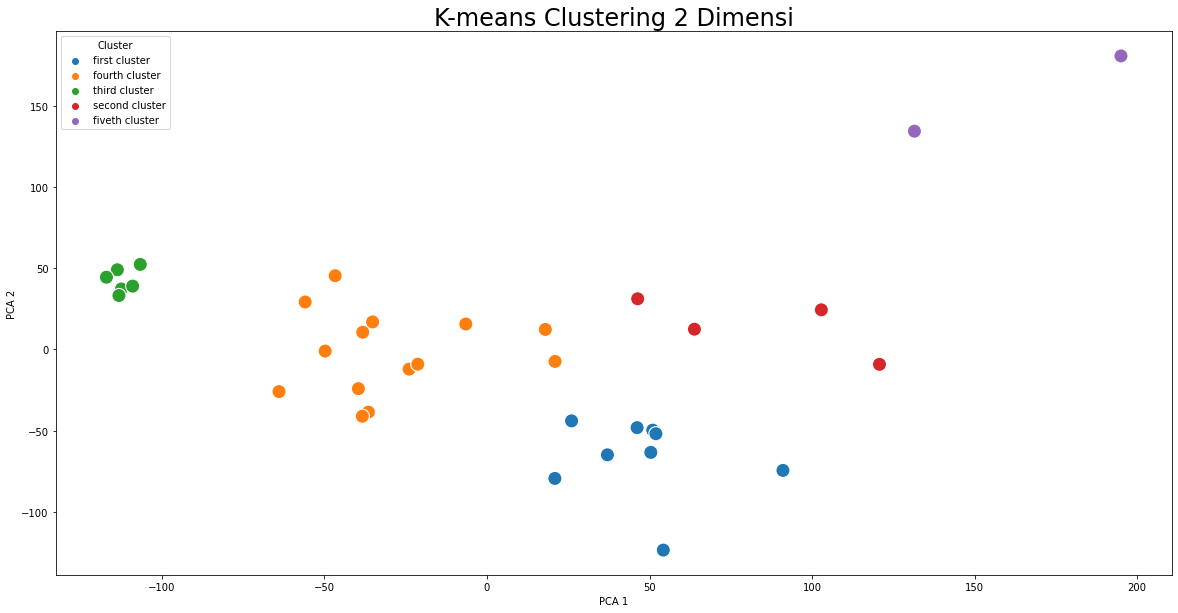

In [54]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['PCA 1','PCA 2'])

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="PCA 1", y="PCA 2", hue=final_data_dbd['Cluster'], data=results,s=200)
plt.title('K-means Clustering 2 Dimensi', fontsize=24)
plt.show()